In [1]:
import xml.etree.cElementTree as ET

In [2]:
# NOTE: font tags were removed before processing
# TTML v1 was used for easier processing. 
# TODO: update processing functions for TTML v3

# transcript = 'power_of_introvert_transcript.xml'
transcript = 'multiplanetary_species.xml'
tree = ET.parse(transcript)
root = tree.getroot()
root

<Element 'transcript' at 0x1067bf510>

In [3]:
for child in root:
    print child.attrib, child.text

{'start': '0.529', 'dur': '0.724'} JEAN LEGALL: Good afternoon, ladies and
{'start': '1.253', 'dur': '2.045'} gentlemen. I&#39;m Jean LeGall. I&#39;m
{'start': '3.298', 'dur': '1.589'} President of the French Space Agency and
{'start': '4.887', 'dur': '2.723'} the President elect of the International
{'start': '7.61', 'dur': '3.3'} Astronautical Federation, and it is my
{'start': '10.91', 'dur': '3.91'} pleasure to welcome you here at the 67th
{'start': '14.82', 'dur': '3.95'} International Astronautical Congress.
{'start': '18.77', 'dur': '2.75'} Elon Musk is founder, C.E.O., and lead
{'start': '21.52', 'dur': '4.54'} designer of SpaceX. Elon founded SpaceX
{'start': '26.06', 'dur': '3.46'} in 2002 with the goal of revolutionizing
{'start': '29.52', 'dur': '3.09'} space technology and ultimately enabling
{'start': '32.61', 'dur': '2.23'} humans to become a multiplanetary
{'start': '34.84', 'dur': '2.7'} species, and that&#39;s the plan he&#39;s going
{'start': '37.54', 'dur': '3.19'} 

{'start': '2710.26', 'dur': '2.61'} government sector side to also do that.
{'start': '2712.87', 'dur': '3.39'} Ultimately, this is going to be a huge
{'start': '2716.26', 'dur': '4.01'} public-private partnership. And I think
{'start': '2720.27', 'dur': '3.02'} that&#39;s -- that&#39;s how the United States
{'start': '2723.29', 'dur': '3.48'} was established, and many other
{'start': '2726.77', 'dur': '1.34'} countries around the world, is a
{'start': '2728.11', 'dur': '1.47'} public-private partnership. So I think
{'start': '2729.58', 'dur': '1.79'} that&#39;s probably what occurs.
{'start': '2731.37', 'dur': '1.299'} And right now we&#39;re just trying to make
{'start': '2732.669', 'dur': '2.051'} as much progress as we can with the
{'start': '2734.72', 'dur': '2.9'} resources that we have available and
{'start': '2737.62', 'dur': '6.75'} just sort of keep moving both forward.
{'start': '2744.37', 'dur': '1.31'} And, hopefully, I think as we -- as we
{'start': '2745.68', 'dur': '2.7

In [4]:
from HTMLParser import HTMLParser
h = HTMLParser()

def format_text(text):
    """Removes escape characters for text clustering"""
    text = text.replace("\n", " ")
    text = h.unescape(text)
    return text

In [5]:
def group_by_text(root, size):
    """Create text arrays based on the number of topics"""
    groups = []
    i = 0
    for i in xrange(len(root) - size):
        sentences = []
        duration = 0
        for j in xrange(size):
            sentences.append(format_text(root[i+j].text))
            duration += float(root[i+j].attrib["dur"])
        text = " ".join(sentences)
        group = {"start": float(root[i].attrib["start"]), "duration": duration, "text": text}
        groups.append(group)
    return groups 

In [6]:
def group_by_time(root, min_time):
    """Create text arrays based on duration"""
    groups = []
    i = 0
    for i in xrange(len(root)):
        sentences = []
        duration = 0
        for j in xrange(i, len(root)):
            sentences.append(format_text(root[j].text))
            duration += float(root[j].attrib["dur"])
            if (duration >= min_time):
                break
        text = " ".join(sentences)
        group = {"start": float(root[i].attrib["start"]), "duration": duration, "text": text}
        groups.append(group)
    return groups

In [7]:
import nltk

# Lets drop common words to avoid extra noise
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend([u"'s",u"n't",u"'m",u"'d"])
print stopwords

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [8]:
import re
from nltk.stem.snowball import SnowballStemmer

# This breaks down words in a sentence into it's absolute root word
stemmer = SnowballStemmer("english")


def tokenize_and_stem(text):
    """Defines a tokenizer returning the set of stems in the text 
    while filtering out numeric tokens and punctuation"""
    tokens = [word for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [9]:
from PIL import Image, ImageDraw
from IPython.display import Image as ImageDisplay

def draw_topigram(corpus, ntopics, topic_order, lda, filename):
    w = len(corpus)
    h = 150
    bar_height = h / ntopics
    
    img = Image.new("RGB", (w, h), "black")
    draw = ImageDraw.Draw(img)
    
    for x in xrange(w):
        text_lda = lda[corpus[x]]
        # print(text_lda)
        for t in text_lda:
            topic = topic_order.index(t[0])
            hue = int(360 * (topic * bar_height / float(h)))
            saturation = 100
            tint = int(pow(t[1], 1) * 100)
            color = "hsl("+ str(hue) + "," + str(saturation) + "%," + str(tint) + "%)"
            
            for y in xrange(topic * int(bar_height), (topic + 1) * int(bar_height)):
                draw.point((x, y), fill=color)
    
    img.save(filename, "PNG")

In [10]:
from gensim import corpora, models

def build_topigram(root, time_clustering, size, ntopics, passes, filename):
    if(time_clustering):
        clusters = group_by_time(root, size) # size seconds long for each group
    else:
        clusters = group_by_text(root, size) # sentence length
        
    documents = []
    for cluster in clusters:
        documents.append(cluster["text"])
        
    tokenized_text = [tokenize_and_stem(text) for text in documents]
    
    sentences = [[word for word in text if word not in stopwords] for text in tokenized_text]
    
    dictionary = corpora.Dictionary(sentences)
    
    corpus = [dictionary.doc2bow(text) for text in sentences]
    
    lda = models.LdaModel(corpus, num_topics=ntopics, id2word=dictionary, passes=passes, chunksize=100)
    print lda
    print lda.show_topics(ntopics)
    
    max_topics = [(0,0,0)] * ntopics
    
    for x in xrange(len(corpus)):
        for y in lda[corpus[x]]:
            t = y[0]
            v = y[1]
            if max_topics[t][1] < v:
                max_topics[t] = (t,v,x)
    topic_order = sorted(max_topics, key = lambda s: s[2])
    topic_order = map(lambda s: s[0], topic_order)
    
    draw_topigram(corpus, ntopics, topic_order, lda, filename) 

LdaModel(num_terms=1016, num_topics=10, decay=0.5, chunksize=100)
[(0, u'0.066*"liquid" + 0.051*"also" + 0.040*"actual" + 0.036*"thing" + 0.031*"becaus" + 0.031*"quit" + 0.029*"veri" + 0.026*"wing" + 0.025*"leak" + 0.025*"mold"'), (1, u'0.026*"applaus" + 0.022*"reason" + 0.022*"go" + 0.021*"know" + 0.021*"ton" + 0.021*"think" + 0.020*"first" + 0.020*"sort" + 0.019*"realli" + 0.019*"real"'), (2, u'0.060*"would" + 0.045*"propel" + 0.044*"greater" + 0.036*"mean" + 0.032*"think" + 0.031*"even" + 0.029*"orbit" + 0.028*"full" + 0.023*"could" + 0.023*"basic"'), (3, u'0.060*"carbon" + 0.058*"fiber" + 0.046*"first" + 0.027*"pressur" + 0.026*"falcon" + 0.025*"insid" + 0.024*"carri" + 0.023*"lay" + 0.023*"technolog" + 0.019*"major"'), (4, u'0.056*"mission" + 0.048*"mar" + 0.043*"work" + 0.033*"day" + 0.029*"go" + 0.028*"need" + 0.027*"lot" + 0.027*"falcon" + 0.025*"nasa" + 0.025*"propel"'), (5, u'0.073*"provid" + 0.037*"take" + 0.035*"peopl" + 0.034*"amount" + 0.019*"like" + 0.018*"steer" + 0.018

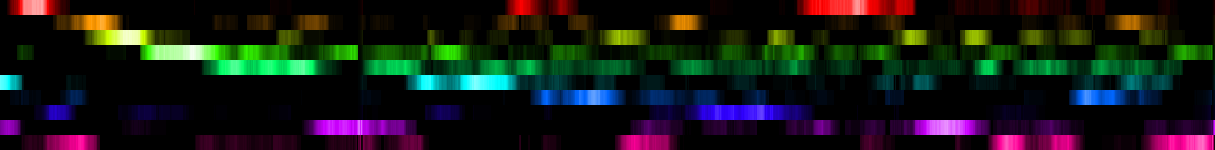

In [11]:
filename = "topicogramtest.png"
build_topigram(root, True, 60, 10, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=10, decay=0.5, chunksize=100)
[(0, u'0.048*"spaceship" + 0.046*"tank" + 0.044*"make" + 0.036*"realli" + 0.029*"booster" + 0.028*"mayb" + 0.023*"big" + 0.022*"got" + 0.021*"flight" + 0.019*"tri"'), (1, u'0.059*"mission" + 0.040*"orbit" + 0.036*"time" + 0.032*"enough" + 0.027*"improv" + 0.022*"year" + 0.021*"element" + 0.020*"later" + 0.019*"capabl" + 0.019*"per"'), (2, u'0.073*"liquid" + 0.049*"lot" + 0.041*"fiber" + 0.037*"also" + 0.036*"carbon" + 0.029*"nasa" + 0.029*"structur" + 0.025*"frame" + 0.023*"falcon" + 0.019*"challeng"'), (3, u'0.078*"solar" + 0.033*"provid" + 0.029*"want" + 0.029*"along" + 0.025*"moon" + 0.025*"one" + 0.025*"anywher" + 0.024*"engin" + 0.023*"see" + 0.023*"earth"'), (4, u'0.039*"carbon" + 0.036*"peopl" + 0.031*"fiber" + 0.026*"build" + 0.024*"take" + 0.024*"trip" + 0.024*"per" + 0.022*"insid" + 0.022*"probabl" + 0.021*"person"'), (5, u'0.054*"go" + 0.053*"mar" + 0.047*"propel" + 0.037*"becaus" + 0.034*"would" + 0.032*"coul

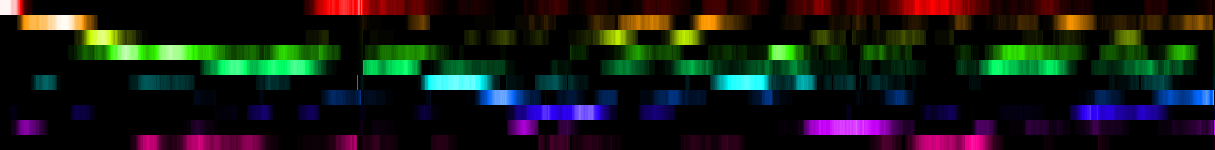

In [13]:
filename = "multiplanetary-species-60-10.png"
build_topigram(root, True, 60, 10, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=10, decay=0.5, chunksize=100)
[(0, u'0.101*"make" + 0.070*"realli" + 0.053*"give" + 0.051*"lot" + 0.041*"saturn" + 0.039*"thing" + 0.038*"much" + 0.029*"becaus" + 0.027*"quit" + 0.024*"progress"'), (1, u'0.079*"station" + 0.066*"mar" + 0.052*"first" + 0.042*"veri" + 0.039*"perhap" + 0.038*"pluto" + 0.036*"elsewher" + 0.035*"well" + 0.035*"moon" + 0.030*"know"'), (2, u'0.081*"engin" + 0.063*"mean" + 0.059*"anywher" + 0.055*"go" + 0.040*"merlin" + 0.040*"actual" + 0.031*"got" + 0.025*"oxygen" + 0.020*"look" + 0.019*"liquid"'), (3, u'0.166*"system" + 0.090*"solar" + 0.058*"earth" + 0.045*"kuiper" + 0.045*"travel" + 0.042*"want" + 0.030*"freedom" + 0.030*"entir" + 0.030*"access" + 0.027*"mayb"'), (4, u'0.091*"anoth" + 0.082*"greater" + 0.058*"dragon" + 0.037*"pressur" + 0.031*"ani" + 0.031*"capabl" + 0.027*"form" + 0.025*"transport" + 0.020*"version" + 0.020*"propuls"'), (5, u'0.084*"applaus" + 0.057*"use" + 0.042*"also" + 0.031*"onli" + 0.031*"want" + 0

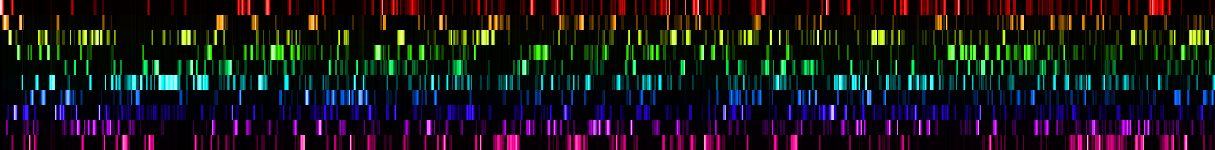

In [14]:
filename = "multiplanetary-species-5-10.png"
build_topigram(root, True, 5, 10, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=5, decay=0.5, chunksize=100)
[(0, u'0.039*"first" + 0.038*"dragon" + 0.035*"engin" + 0.032*"carbon" + 0.030*"fiber" + 0.020*"space" + 0.019*"station" + 0.019*"launch" + 0.019*"onli" + 0.016*"pressur"'), (1, u'0.068*"system" + 0.030*"applaus" + 0.027*"engin" + 0.026*"anywher" + 0.021*"station" + 0.020*"way" + 0.020*"basic" + 0.019*"access" + 0.019*"entir" + 0.019*"provid"'), (2, u'0.028*"make" + 0.027*"realli" + 0.022*"also" + 0.020*"mission" + 0.019*"merlin" + 0.016*"land" + 0.016*"abl" + 0.015*"raptor" + 0.015*"progress" + 0.014*"liquid"'), (3, u'0.045*"go" + 0.040*"mar" + 0.038*"solar" + 0.032*"propel" + 0.027*"would" + 0.025*"time" + 0.024*"greater" + 0.023*"want" + 0.020*"earth" + 0.019*"think"'), (4, u'0.030*"spaceship" + 0.029*"tank" + 0.022*"make" + 0.022*"realli" + 0.021*"actual" + 0.019*"becaus" + 0.018*"big" + 0.017*"booster" + 0.017*"get" + 0.017*"use"')]


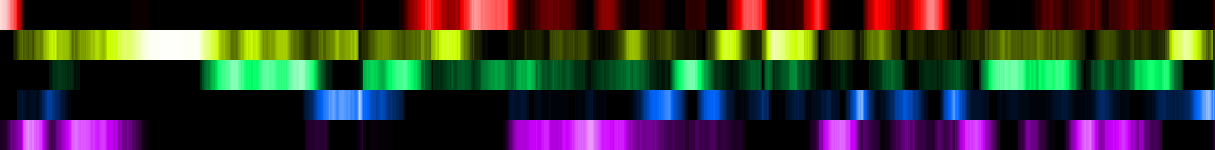

In [15]:
filename = "multiplanetary-species-60-10.png"
build_topigram(root, True, 60, 5, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=5, decay=0.5, chunksize=100)
[(0, u'0.043*"mar" + 0.029*"say" + 0.024*"go" + 0.024*"would" + 0.021*"peopl" + 0.021*"think" + 0.020*"want" + 0.016*"establish" + 0.015*"anoth" + 0.014*"probabl"'), (1, u'0.064*"system" + 0.035*"solar" + 0.021*"greater" + 0.021*"way" + 0.020*"applaus" + 0.019*"want" + 0.018*"realli" + 0.016*"engin" + 0.015*"actual" + 0.015*"one"'), (2, u'0.054*"propel" + 0.033*"use" + 0.029*"mission" + 0.028*"time" + 0.028*"even" + 0.028*"would" + 0.026*"orbit" + 0.023*"abl" + 0.020*"think" + 0.019*"could"'), (3, u'0.043*"make" + 0.032*"engin" + 0.026*"tank" + 0.023*"fiber" + 0.022*"carbon" + 0.021*"merlin" + 0.020*"oxygen" + 0.017*"also" + 0.017*"liquid" + 0.016*"rocket"'), (4, u'0.025*"spaceship" + 0.024*"realli" + 0.023*"booster" + 0.021*"first" + 0.019*"dragon" + 0.018*"go" + 0.018*"launch" + 0.017*"make" + 0.014*"tri" + 0.014*"cargo"')]


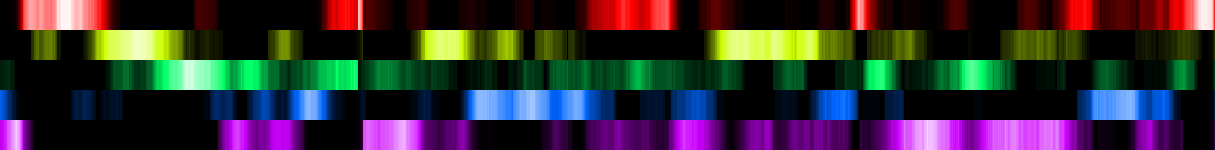

In [16]:
filename = "multiplanetary-species-60-5-higher-bars.png"
build_topigram(root, True, 60, 5, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=5, decay=0.5, chunksize=100)
[(0, u'0.032*"tank" + 0.029*"spaceship" + 0.025*"mar" + 0.024*"go" + 0.024*"propel" + 0.023*"time" + 0.021*"would" + 0.021*"get" + 0.016*"becaus" + 0.015*"like"'), (1, u'0.031*"make" + 0.024*"carbon" + 0.023*"fiber" + 0.020*"realli" + 0.020*"merlin" + 0.018*"want" + 0.017*"system" + 0.016*"thing" + 0.016*"first" + 0.016*"liquid"'), (2, u'0.022*"mar" + 0.018*"get" + 0.016*"base" + 0.016*"would" + 0.016*"number" + 0.014*"around" + 0.014*"need" + 0.014*"move" + 0.013*"one" + 0.012*"think"'), (3, u'0.026*"go" + 0.025*"first" + 0.023*"dragon" + 0.023*"space" + 0.019*"station" + 0.018*"mission" + 0.018*"realli" + 0.016*"cargo" + 0.015*"lot" + 0.015*"think"'), (4, u'0.068*"engin" + 0.040*"also" + 0.037*"land" + 0.029*"realli" + 0.029*"booster" + 0.027*"well" + 0.025*"rocket" + 0.024*"veri" + 0.022*"launch" + 0.021*"look"')]


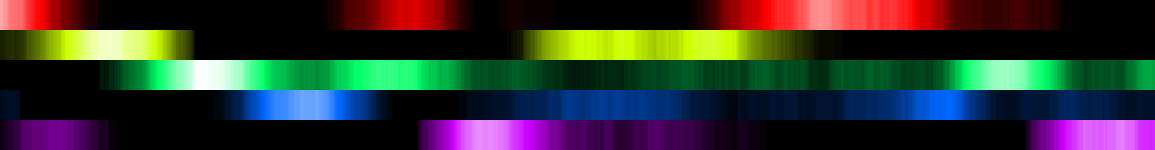

In [17]:
filename = "multiplanetary-species-60-5-text-cluster.png"
build_topigram(root, False, 60, 5, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=10, decay=0.5, chunksize=100)
[(0, u'0.076*"land" + 0.066*"dragon" + 0.049*"mission" + 0.031*"put" + 0.029*"could" + 0.028*"seven" + 0.024*"well" + 0.023*"space" + 0.023*"abl" + 0.020*"manag"'), (1, u'0.060*"go" + 0.030*"ship" + 0.029*"mar" + 0.027*"kind" + 0.023*"pressur" + 0.022*"propuls" + 0.022*"realli" + 0.020*"say" + 0.019*"becaus" + 0.019*"minut"'), (2, u'0.087*"first" + 0.056*"launch" + 0.046*"engin" + 0.037*"also" + 0.030*"falcon" + 0.021*"test" + 0.020*"carri" + 0.020*"got" + 0.020*"major" + 0.019*"thought"'), (3, u'0.099*"carbon" + 0.095*"fiber" + 0.044*"use" + 0.033*"insid" + 0.030*"advanc" + 0.022*"particular" + 0.021*"cryogen" + 0.021*"sort" + 0.020*"actual" + 0.019*"crack"'), (4, u'0.059*"tank" + 0.054*"spaceship" + 0.047*"propel" + 0.042*"time" + 0.038*"would" + 0.027*"even" + 0.026*"year" + 0.025*"orbit" + 0.025*"get" + 0.022*"capabl"'), (5, u'0.054*"make" + 0.042*"engin" + 0.028*"system" + 0.027*"merlin" + 0.026*"realli" + 0.023*"ox

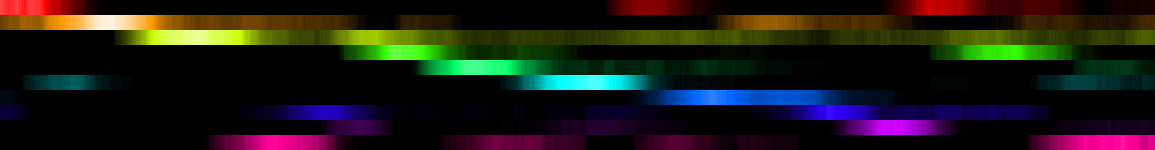

In [18]:
filename = "multiplanetary-species-60-10-text-cluster.png"
build_topigram(root, False, 60, 10, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=10, decay=0.5, chunksize=100)
[(0, u'0.046*"space" + 0.039*"first" + 0.033*"station" + 0.024*"go" + 0.022*"realli" + 0.021*"think" + 0.019*"make" + 0.019*"fund" + 0.014*"lot" + 0.014*"person"'), (1, u'0.042*"dragon" + 0.036*"launch" + 0.031*"mayb" + 0.030*"mar" + 0.026*"spaceship" + 0.021*"think" + 0.019*"like" + 0.019*"realli" + 0.018*"start" + 0.017*"minut"'), (2, u'0.093*"engin" + 0.046*"carbon" + 0.044*"fiber" + 0.044*"tank" + 0.027*"oxygen" + 0.025*"pressur" + 0.020*"kind" + 0.018*"actual" + 0.017*"advanc" + 0.016*"flight"'), (3, u'0.038*"time" + 0.030*"feel" + 0.027*"new" + 0.027*"wing" + 0.026*"would" + 0.022*"trickiest" + 0.021*"refurbish" + 0.021*"basic" + 0.020*"take" + 0.020*"later"'), (4, u'0.046*"propel" + 0.033*"system" + 0.026*"spaceship" + 0.024*"use" + 0.022*"rocket" + 0.021*"make" + 0.020*"depot" + 0.020*"part" + 0.019*"also" + 0.017*"mar"'), (5, u'0.044*"make" + 0.034*"merlin" + 0.030*"go" + 0.028*"want" + 0.025*"realli" + 0.021*"b

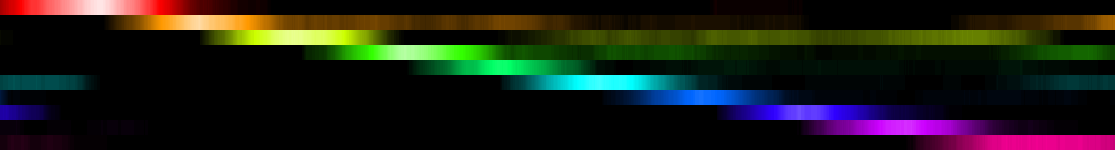

In [19]:
filename = "multiplanetary-species-100-10-text-cluster.png"
build_topigram(root, False, 100, 10, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=10, decay=0.5, chunksize=100)
[(0, u'0.078*"system" + 0.049*"solar" + 0.027*"realli" + 0.024*"want" + 0.023*"applaus" + 0.021*"raptor" + 0.020*"anywher" + 0.019*"way" + 0.018*"mean" + 0.017*"jupit"'), (1, u'0.075*"propel" + 0.063*"mar" + 0.035*"fact" + 0.033*"veri" + 0.028*"one" + 0.027*"element" + 0.026*"look" + 0.026*"build" + 0.023*"day" + 0.022*"also"'), (2, u'0.043*"depot" + 0.041*"basic" + 0.037*"fill" + 0.026*"interest" + 0.025*"lot" + 0.024*"think" + 0.019*"perhap" + 0.018*"make" + 0.017*"system" + 0.017*"go"'), (3, u'0.050*"carbon" + 0.047*"fiber" + 0.045*"tank" + 0.038*"make" + 0.027*"liquid" + 0.026*"actual" + 0.023*"size" + 0.018*"thing" + 0.018*"vehicl" + 0.018*"first"'), (4, u'0.056*"space" + 0.021*"peopl" + 0.021*"take" + 0.018*"refurbish" + 0.017*"technolog" + 0.017*"go" + 0.017*"think" + 0.016*"station" + 0.016*"mar" + 0.015*"first"'), (5, u'0.045*"booster" + 0.036*"dragon" + 0.035*"land" + 0.029*"get" + 0.028*"go" + 0.025*"realli" +

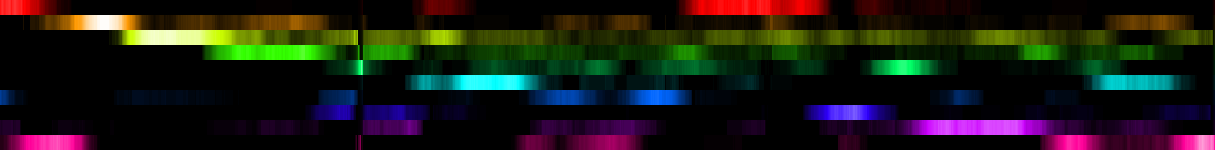

In [20]:
filename = "multiplanetary-species-100-10-time-cluster.png"
build_topigram(root, True, 100, 10, 10, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=5, decay=0.5, chunksize=100)
[(0, u'0.038*"station" + 0.032*"land" + 0.032*"dragon" + 0.031*"launch" + 0.025*"first" + 0.025*"space" + 0.019*"cargo" + 0.019*"think" + 0.019*"ton" + 0.017*"time"'), (1, u'0.050*"go" + 0.046*"mar" + 0.031*"greater" + 0.027*"would" + 0.020*"earth" + 0.019*"want" + 0.018*"say" + 0.018*"full" + 0.017*"think" + 0.016*"peopl"'), (2, u'0.029*"make" + 0.028*"spaceship" + 0.026*"use" + 0.025*"tank" + 0.024*"realli" + 0.024*"propel" + 0.021*"booster" + 0.020*"becaus" + 0.019*"actual" + 0.017*"mayb"'), (3, u'0.025*"make" + 0.021*"realli" + 0.020*"liquid" + 0.019*"lot" + 0.018*"abl" + 0.017*"go" + 0.017*"much" + 0.015*"progress" + 0.015*"thing" + 0.014*"also"'), (4, u'0.060*"system" + 0.041*"engin" + 0.030*"solar" + 0.020*"want" + 0.017*"carbon" + 0.017*"way" + 0.017*"realli" + 0.016*"fiber" + 0.016*"applaus" + 0.014*"anywher"')]


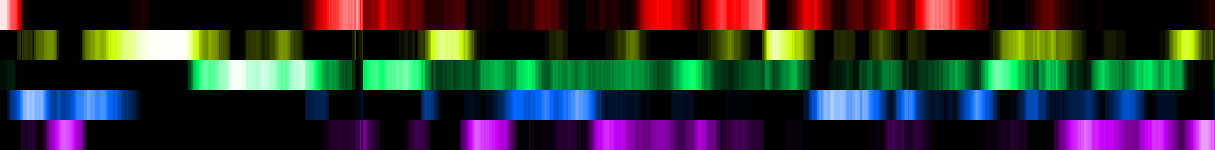

In [22]:
filename = "multiplanetary-species-60-5-10.png"
build_topigram(root, True, 60, 5, 20, filename)
ImageDisplay(filename=filename)

LdaModel(num_terms=1016, num_topics=5, decay=0.5, chunksize=100)
[(0, u'0.041*"engin" + 0.026*"realli" + 0.025*"make" + 0.022*"tank" + 0.016*"rocket" + 0.014*"vehicl" + 0.013*"also" + 0.013*"merlin" + 0.013*"capabl" + 0.012*"becaus"'), (1, u'0.031*"mar" + 0.028*"use" + 0.025*"mission" + 0.024*"carbon" + 0.022*"fiber" + 0.022*"liquid" + 0.018*"thing" + 0.017*"falcon" + 0.016*"day" + 0.015*"veri"'), (2, u'0.045*"system" + 0.035*"would" + 0.032*"propel" + 0.028*"go" + 0.026*"time" + 0.024*"solar" + 0.022*"mar" + 0.018*"orbit" + 0.018*"cost" + 0.016*"greater"'), (3, u'0.034*"first" + 0.027*"station" + 0.026*"applaus" + 0.024*"dragon" + 0.020*"space" + 0.016*"think" + 0.016*"ton" + 0.015*"mar" + 0.014*"launch" + 0.013*"go"'), (4, u'0.028*"booster" + 0.028*"spaceship" + 0.025*"get" + 0.023*"land" + 0.022*"like" + 0.021*"realli" + 0.021*"mayb" + 0.019*"go" + 0.018*"anywher" + 0.018*"actual"')]


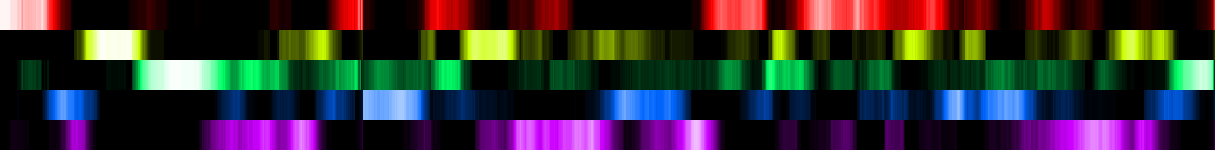

In [23]:
filename = "multiplanetary-species-60-5-50.png"
build_topigram(root, True, 60, 5, 50, filename)
ImageDisplay(filename=filename)